<a href="https://colab.research.google.com/github/diegorusso/deep-learning-from-scratch/blob/master/02_regressions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression

Although the example is very simple, it shows many of the concepts needed for compex deep learning problems. The main advantage is that it can be illustrated.

Our machine will "learn" the function that maps one sets of numbers to another one: for example given a new one that it hasn't seen before, ir correctly predicts the result.

In other words the regression task is: **given a specific value of input x, predict the corresponding value of output y.**

For this example we assume the relationship between the inputs and the outputs that the machine has to learn is a **linear** function.

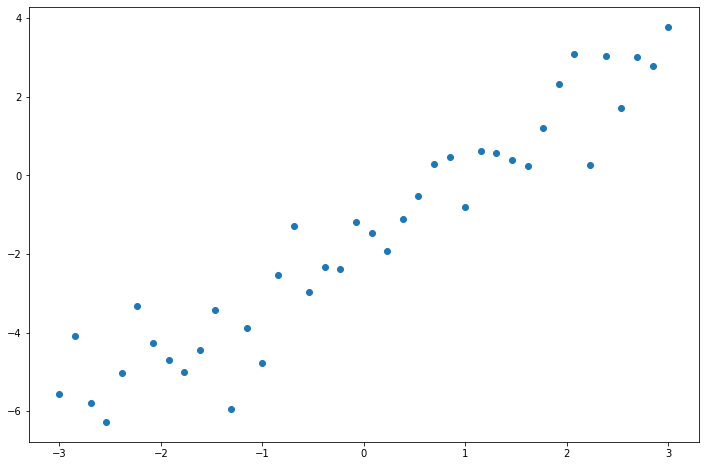

In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

m = 40  # No. of points to generate
train_slope  = 1.5
train_offset = -1.5

# Generate training data
train_x = np.linspace(-3, 3, m)
rng = np.random.RandomState(seed=28)
train_y = train_slope * train_x + train_offset + rng.standard_normal(size=len(train_x))

# Plot the data
plt.rcParams["figure.figsize"] = (12, 8)
plt.plot(train_x, train_y, 'o');
plt.show()

Define two Python functions that represent a hypothesis (a straight line parameterized by slope and offset) and a cost function (the mean squared error) for linear regression.

The **hypothesis** is a mathematical formula that calculates the predicted outputs from the given inputs. The hypothesis is also known as a *model* (this is extremely simplistic model)

Slope and offset are **trainable parameters**, that means those parameters need to be learned.


In [ ]:
# Define functions hypothesis and cost
def hypothesis(x, slope, offset):
    return slope * x + offset

def cost(x, slope, offset, y):
    return np.mean(np.square(hypothesis(x, slope, offset) - y )) / 2.0

The **cost** function calculates the MSE and it can be shown in the following image.

The cost function sometimes is referred as loss, objective, energy, fitness function (depending on the domain).

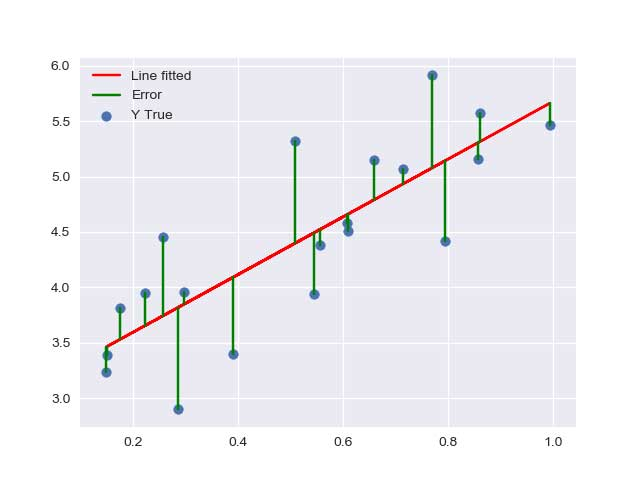

In the above case the red line is the hypothesis (our model) and the green lines express the individual error for every Y.

If we plot the cost as a function of the slop and offset we have something similar to the image below:

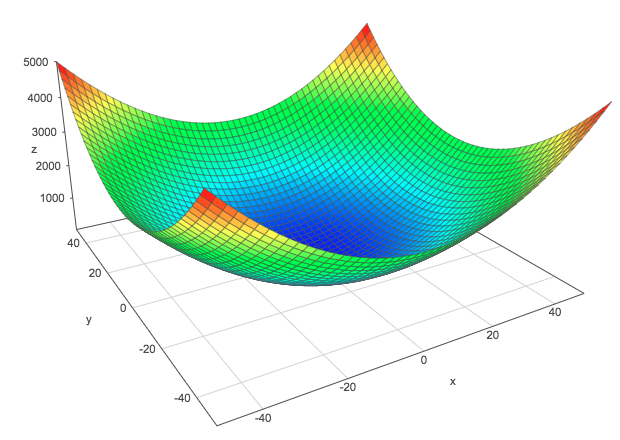

The goal of mathematical optimization is to find values for the parameters that minimise the value of the cost function.

The above problem is easy to solve because the minima is easy to find (at the bottom of the bowl shape)

For more complex cases the gradient descend is a more scalable solution: starting from a random poin on the surface, moves downhill until it can't go any lower. This is the minimum of the cost function.

The following code shows an implementation of the gradiend descend by calling the two function that calculate the derivative of the cost function with respect of the two parameters.

The algorithm print out the cost at each step and continue training until the cost reaches a stable value.

Cost at step 0 = 4.677, slope=0.120, offset=-0.050
Cost at step 1 = 4.527, slope=0.161, offset=-0.029
Cost at step 2 = 4.456, slope=0.169, offset=-0.051
Cost at step 3 = 4.405, slope=0.177, offset=-0.063
Cost at step 4 = 4.336, slope=0.186, offset=-0.085
Cost at step 5 = 4.317, slope=0.187, offset=-0.096
Cost at step 6 = 4.309, slope=0.182, offset=-0.114
Cost at step 7 = 4.311, slope=0.182, offset=-0.115
Cost at step 8 = 4.308, slope=0.182, offset=-0.114
Cost at step 9 = 4.182, slope=0.217, offset=-0.101
Cost at step 10 = 4.128, slope=0.222, offset=-0.123
Cost at step 11 = 3.899, slope=0.286, offset=-0.100
Cost at step 12 = 3.920, slope=0.280, offset=-0.103
Cost at step 13 = 3.904, slope=0.279, offset=-0.117
Cost at step 14 = 3.863, slope=0.286, offset=-0.127
Cost at step 15 = 3.272, slope=0.424, offset=-0.181
Cost at step 16 = 3.241, slope=0.435, offset=-0.175
Cost at step 17 = 3.042, slope=0.477, offset=-0.217
Cost at step 18 = 2.887, slope=0.514, offset=-0.242
Cost at step 19 = 2.87

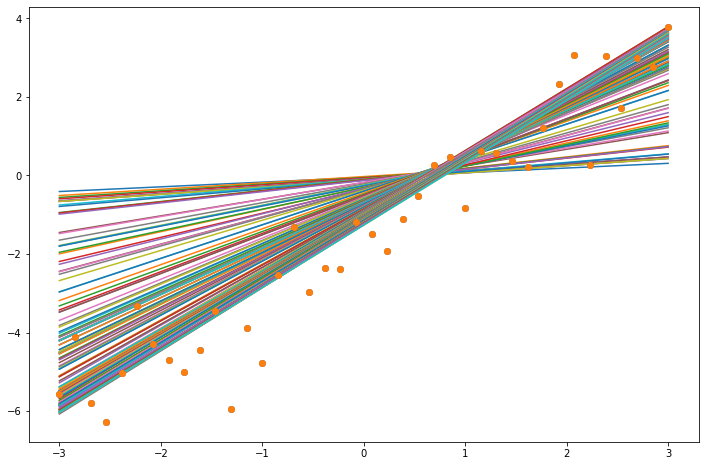

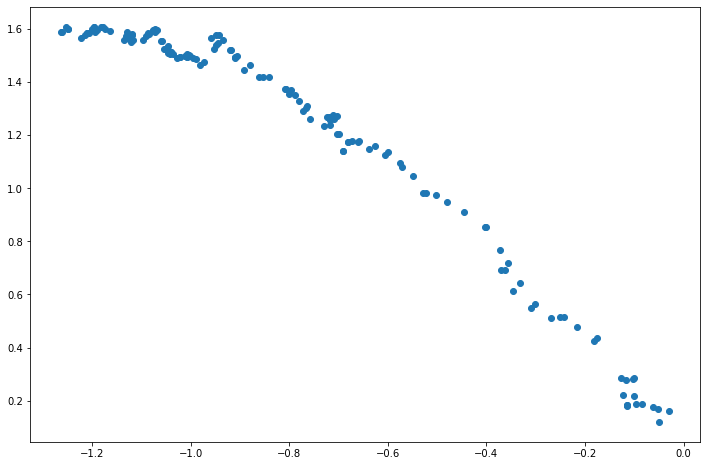

In [7]:
def hypothesis(x, slope, offset):
    return slope * x + offset

def cost(x, slope, offset, y):
    return np.mean(np.square(hypothesis(x, slope, offset) - y)) / 2.0

# Define two Python functions that calculate the partial derivatives of the cost
# function with respect to the two parameters slope and offset.
def derivative_wrt_slope(x, y):
    return np.mean((hypothesis(x, slope, offset) - y) * x)

def derivative_wrt_offset(x, y):
    return np.mean((hypothesis(x, slope, offset) - y))


num_steps = 150
learning_rate = 0.01
slope  = 0
offset = 0

slope_at_step  = np.empty((num_steps))
offset_at_step = np.empty((num_steps))
plt.rcParams["figure.figsize"] = (12, 8)

for step in range(num_steps):
    k = np.random.randint(m)
    x = train_x[k]
    y = train_y[k]
    
    # Update learned parameter values
    new_slope  = slope  - learning_rate * derivative_wrt_slope(x, y)
    new_offset = offset - learning_rate * derivative_wrt_offset(x, y)

    slope  = new_slope
    offset = new_offset
    
    slope_at_step[step] = slope
    offset_at_step[step] = offset
    
    print('Cost at step {} = {:5.3f}, slope={:5.3f}, offset={:5.3f}'.format(step, cost(train_x, slope, offset, train_y), slope, offset))
    plt.plot(train_x, slope * train_x + offset)

plt.plot(train_x, train_y, 'o');
plt.plot(train_x, train_y, 'o');
plt.show()

plt.scatter(offset_at_step, slope_at_step)
plt.show()